# Практическое задание №2

Промоделировать выборку с заданным законом рапсределения, построить гистограмму, оценить пара-
метры по методу моментов и максимального правдоподобия, изобразить на гистограмме плотности
распределения, соответствующие оценкам из разных методов. Применить статистику хи-квадрат для
проверки согласия эмпирического и теоретического распределений.

Вариант 1 - нормальное

In [106]:
import numpy as np
import scipy
import seaborn as sns
import matplotlib.pyplot as plt

In [107]:
import warnings
warnings.filterwarnings('ignore')

Промоделируем нормальное распределение 

In [108]:
mu = 3
sigma = 2
size = 10**3
num_bins = 20

In [109]:
selection = np.random.normal(mu, sigma, size)

Гистограмма частот

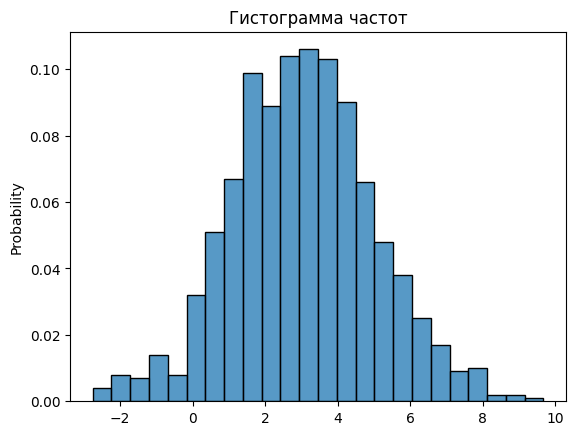

In [110]:
plt.title("Гистограмма частот")
sns.histplot(data=selection, stat="probability");

### Оценка параметров. 1) Метод моментов

$$
    \mu = \overline{X}, \; \sigma = \sqrt{s^2}
$$

In [111]:
mu_omm = np.mean(selection)
sigma_omm = np.sqrt(np.var(selection))

In [112]:
print(mu_omm)
print(sigma_omm)

3.042742764863492
1.966279323000935


### Оценка параметров. 2) Метод максимального правдоподобия

Реализуем логарифмирование функции правдоподобия

In [113]:
def log_likelihood(params, data):
    mu, sigma = params
    n = len(data)
    log_likelihood = - n / 2 * np.log(2 * np.pi) - n / 2 * np.log(sigma ** 2) - np.sum((data - mu) ** 2) / (2 * sigma ** 2)
    return -log_likelihood

initial_guess = [1, 1]
result = scipy.optimize.minimize(log_likelihood, initial_guess, args=(selection,))
mu_omp, sigma_omp = result.x
print("Оценка среднего:", mu_omp)
print("Оценка стандартного отклонения:", sigma_omp)

Оценка среднего: 3.042742754828932
Оценка стандартного отклонения: 1.9662793171183108


### Гистограмма и плотности распределния

In [114]:
selection_omm = np.random.normal(mu_omm, sigma_omm, size)
selection_omp = np.random.normal(mu_omp, sigma_omp, size)

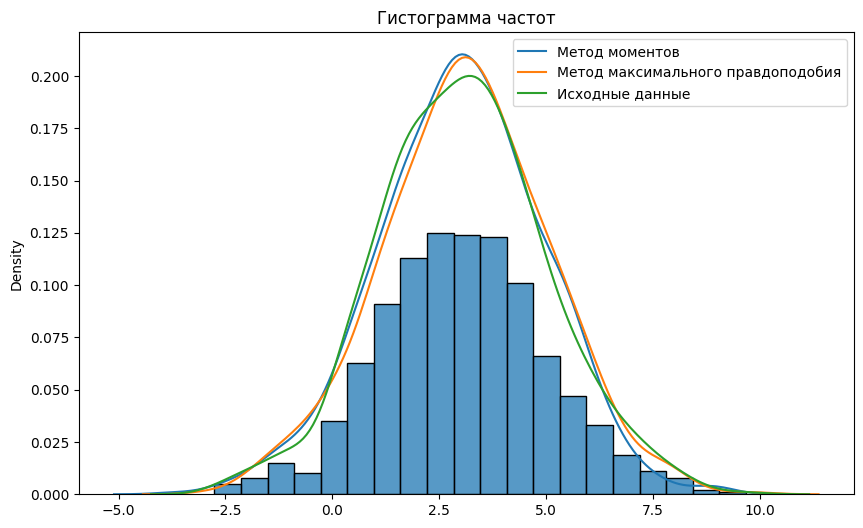

In [115]:
plt.figure(figsize=(10, 6))
plt.title("Гистограмма частот")

sns.kdeplot(data=selection_omm)
sns.kdeplot(data=selection_omp)
sns.kdeplot(data=selection)
plt.legend(["Метод моментов", "Метод максимального правдоподобия", "Исходные данные"], loc="upper right")
sns.histplot(data=selection, bins=num_bins, stat="probability")
plt.show()

Оба метода дают примерно одинаковую оценку параметров и достаточно близки к истинным значениям.

### Проверка гипотезы согласия

In [116]:
values, bins = np.histogram(selection, bins=num_bins)

- Выборка, полученная с помощью метода моментов

In [117]:
values_omm, bins_omm = np.histogram(selection_omm, bins=num_bins)

In [130]:
stat_omm, p_value_omm = scipy.stats.chisquare(f_obs=values_omm/num_bins, f_exp=values/num_bins)

In [131]:
print(f"Статистика хи-квадрат: {stat_omm}")
print(f"p-уровень значимости: {p_value_omm}")

Статистика хи-квадрат: 9.711294337675909
p-уровень значимости: 0.959711620727554


In [120]:
values

array([  5,   8,  15,  10,  35,  63,  91, 113, 125, 124, 123, 101,  66,
        47,  33,  19,  11,   8,   2,   1])

In [121]:
values_omm

array([  1,   3,   5,  16,  17,  26,  57,  69, 109, 117, 143, 130, 101,
        76,  68,  33,  16,   7,   1,   5])

In [122]:
values_omp

array([    1,     0,     6,    12,    27,    88,   219,   547,  1110,
        2208,  3622,  5586,  7934, 10214, 11915, 12601, 11904, 10409,
        7956,  5633,  3795,  2113,  1147,   541,   267,    98,    30,
          12,     4,     1])

- Выборка, полученная с помощью метода максимального правдоподобия

In [123]:
values_omp, bins_omp = np.histogram(selection_omp, bins=num_bins)

In [132]:
stat_omp, p_value_omp = scipy.stats.chisquare(f_obs=values_omp/num_bins, f_exp=values/num_bins)

In [133]:
print(f"Статистика хи-квадрат: {stat_omp}")
print(f"p-уровень значимости: {p_value_omp}")

Статистика хи-квадрат: 1.7649296907716279
p-уровень значимости: 0.9999998785615578


В обоих случаях уровень значимости больше 0.05, следовательно нулевая гипотеза не отвергается и выборки нормально распределены. 